### 1. Re-code the house price machine learning

In [1]:
%matplotlib inline

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
print(df.describe())
print(data['DESCR'])
X = df.RM # I choose RM column

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

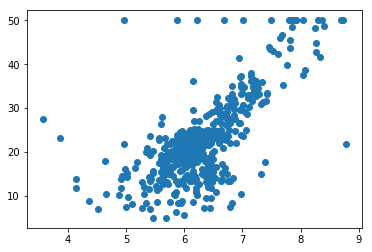

In [2]:
import random

def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X]

plt.scatter(X, y)
# draw_rm_and_price()
# plt.scatter(X, price_by_random_k_and_b)
plt.savefig("plot.png")

###### 1. Random Choose Method to get optimal *k* and *b*

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [3]:
def RMSE(y, y_hat):
    return np.sqrt(sum((y - y_hat) ** 2) / len(y))

def MAE(y, y_hat):
    return sum(abs(y - y_hat)) / len(y)

def loss_random(X, y, n, loss=RMSE):
    loss_min = float('inf')
    k_best, b_best = 0, 0
    for i in range(n):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        y_hat = k * X + b
        loss_new = loss(y, y_hat)
        if loss_new < loss_min:
            loss_min = loss_new
            k_best, b_best = k, b
            print(f"round: {i}, k: {k_best}, b: {b_best}, {loss.__name__}: {loss_min}")
        
    return (k_best, b_best)
loss_random(X, y, 2000, RMSE)

round: 0, k: 39.78313539547378, b: -42.553520850823865, RMSE: 186.30287320208564
round: 2, k: 29.211778034979886, b: -29.68934722745702, RMSE: 132.28429197646585
round: 12, k: -25.151782735947364, b: 95.15302856649043, RMSE: 89.01301850593477
round: 16, k: 4.040032224742035, b: 16.895435863873317, RMSE: 21.128109463676168
round: 37, k: 14.988955665079956, b: -72.6918047710123, RMSE: 7.856493935804529
round: 671, k: 14.187521190895524, b: -66.69517029495044, RMSE: 7.506431951543031
round: 1268, k: 7.233520680658856, b: -25.68910395443052, RMSE: 7.276594291831291


(7.233520680658856, -25.68910395443052)

###### 2.Supervised Direction to get optimal *k* and *b*

In [4]:
# This is a combination of supervising and random walking.
def loss_spvs_dr(X, y, n, alpha=0.1, loss=RMSE):
    loss_min = float('inf')
    direction = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        dr_k, dr_b = random.choice(direction) # random walk. Can we walk 4 directions and compare which one is the best?
        k_new = k + dr_k * alpha
        b_new = b + dr_b * alpha
        y_hat = k_new * X + b_new
        loss_new = loss(y, y_hat)
        if loss_new < loss_min:
            k, b = k_new, b_new
            k_best, b_best = k_new, b_new
            loss_min = loss_new
            print(f"round: {i}, k: {k_best}, b: {b_best}, {loss.__name__}: {loss_min}")
    return (k_best, b_best)
loss_spvs_dr(X, y, 2000)

round: 0, k: 21.379955885733075, b: 37.48503011394484, RMSE: 149.71161270108686
round: 2, k: 21.279955885733074, b: 37.385030113944836, RMSE: 148.98103281804177
round: 7, k: 21.179955885733072, b: 37.285030113944835, RMSE: 148.25046533946576
round: 8, k: 21.07995588573307, b: 37.385030113944836, RMSE: 147.719385304863
round: 9, k: 20.97995588573307, b: 37.48503011394484, RMSE: 147.18831990834565
round: 10, k: 20.879955885733068, b: 37.58503011394484, RMSE: 146.6572693089329
round: 13, k: 20.779955885733067, b: 37.48503011394484, RMSE: 145.9267539087127
round: 14, k: 20.679955885733065, b: 37.58503011394484, RMSE: 145.39573177247618
round: 15, k: 20.579955885733064, b: 37.48503011394484, RMSE: 144.66524337654286
round: 17, k: 20.479955885733062, b: 37.58503011394484, RMSE: 144.13425040608047
round: 20, k: 20.37995588573306, b: 37.68503011394484, RMSE: 143.60327308305858
round: 24, k: 20.27995588573306, b: 37.58503011394484, RMSE: 142.8728266975896
round: 26, k: 20.179955885733058, b: 37

round: 221, k: 10.37995588573302, b: 36.88503011394483, RMSE: 79.86493805626438
round: 222, k: 10.27995588573302, b: 36.98503011394483, RMSE: 79.33756710296282
round: 224, k: 10.17995588573302, b: 36.88503011394483, RMSE: 78.61098757918884
round: 229, k: 10.079955885733021, b: 36.98503011394483, RMSE: 78.08378051087193
round: 233, k: 9.979955885733022, b: 36.88503011394483, RMSE: 77.35738847445488
round: 234, k: 9.879955885733022, b: 36.78503011394483, RMSE: 76.63110005848081
round: 235, k: 9.779955885733022, b: 36.88503011394483, RMSE: 76.10415810563816
round: 237, k: 9.679955885733023, b: 36.98503011394483, RMSE: 75.57730259065569
round: 238, k: 9.579955885733023, b: 37.08503011394483, RMSE: 75.05053533391734
round: 239, k: 9.479955885733023, b: 36.98503011394483, RMSE: 74.32464819853601
round: 241, k: 9.379955885733024, b: 37.08503011394483, RMSE: 73.79807385340519
round: 242, k: 9.279955885733024, b: 37.18503011394483, RMSE: 73.27159395171928
round: 244, k: 9.179955885733024, b: 37

round: 441, k: -1.5200441142669605, b: 35.38503011394481, RMSE: 10.491749888876985
round: 444, k: -1.6200441142669606, b: 35.285030113944806, RMSE: 10.336936504608431
round: 445, k: -1.7200441142669607, b: 35.185030113944805, RMSE: 10.23224651468743
round: 446, k: -1.8200441142669608, b: 35.0850301139448, RMSE: 10.179226544380956
round: 447, k: -1.9200441142669609, b: 34.9850301139448, RMSE: 10.17868406100697
round: 448, k: -1.8200441142669608, b: 34.8850301139448, RMSE: 10.159285814303292


(-1.8200441142669608, 34.8850301139448)

#### Walk through all 4 directions and find the smallest loss

In [5]:
# Here I try completely supervised direction: walk all 4 directions at the same time, 
# then select the one with smallest loss.
def calculate_loss(X, y, n, alpha=0.01, loss=RMSE):
    '''
    calculate the loss for all 4 directions and select the smallest one
    '''
    loss_min = float('inf')
    direction = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        loss_complete = []
        best_data = []
        k_b = []
        for coord in direction:
            dr_k, dr_b = coord
#             print(dr_k, dr_b)
            k_new = k + dr_k * alpha
            b_new = b + dr_b * alpha
            k_b.append((k_new, b_new))
            y_hat = k_new * X + b_new
            loss_complete.append(loss(y, y_hat))
        best_data = sorted(zip(loss_complete, k_b), key=lambda x: x[0])[0]
#         print(best_data)
        loss_new, (k_n, b_n) = best_data
        if loss_new < loss_min:
            k, b = k_n, b_n
            k_best, b_best = k_new, b_new
            loss_min = loss_new
            print(f"round: {i}, k: {k}, b: {b}, {loss.__name__}: {loss_min}")
    return (k_best, b_best)
calculate_loss(X, y, 2000, alpha=0.1)

round: 0, k: -38.06942966501544, b: 14.010576812951092, RMSE: 250.06441874530262
round: 1, k: -37.96942966501544, b: 14.110576812951091, RMSE: 249.33333368129792
round: 2, k: -37.86942966501544, b: 14.210576812951091, RMSE: 248.6022530442964
round: 3, k: -37.76942966501544, b: 14.31057681295109, RMSE: 247.87117687346955
round: 4, k: -37.669429665015436, b: 14.41057681295109, RMSE: 247.14010520845207
round: 5, k: -37.569429665015434, b: 14.51057681295109, RMSE: 246.40903808934868
round: 6, k: -37.46942966501543, b: 14.61057681295109, RMSE: 245.6779755567416
round: 7, k: -37.36942966501543, b: 14.71057681295109, RMSE: 244.94691765169702
round: 8, k: -37.26942966501543, b: 14.810576812951089, RMSE: 244.21586441577256
round: 9, k: -37.16942966501543, b: 14.910576812951088, RMSE: 243.48481589102482
round: 10, k: -37.06942966501543, b: 15.010576812951088, RMSE: 242.75377212001655
round: 11, k: -36.969429665015426, b: 15.110576812951088, RMSE: 242.02273314582476
round: 12, k: -36.869429665015

round: 122, k: -25.869429665015268, b: 26.21057681295123, RMSE: 160.9225281464623
round: 123, k: -25.769429665015267, b: 26.310576812951233, RMSE: 160.19251166981496
round: 124, k: -25.669429665015265, b: 26.410576812951234, RMSE: 159.46251188597944
round: 125, k: -25.569429665015264, b: 26.510576812951236, RMSE: 158.7325290252629
round: 126, k: -25.469429665015262, b: 26.610576812951237, RMSE: 158.00256332222338
round: 127, k: -25.36942966501526, b: 26.71057681295124, RMSE: 157.27261501576794
round: 128, k: -25.26942966501526, b: 26.81057681295124, RMSE: 156.5426843492539
round: 129, k: -25.169429665015258, b: 26.91057681295124, RMSE: 155.81277157059316
round: 130, k: -25.069429665015257, b: 27.010576812951243, RMSE: 155.0828769323583
round: 131, k: -24.969429665015255, b: 27.110576812951244, RMSE: 154.35300069189344
round: 132, k: -24.869429665015254, b: 27.210576812951246, RMSE: 153.6231431114261
round: 133, k: -24.769429665015252, b: 27.310576812951247, RMSE: 152.89330445818516
rou

round: 239, k: -14.169429665015135, b: 37.9105768129514, RMSE: 75.74944073577
round: 240, k: -14.069429665015136, b: 38.0105768129514, RMSE: 75.02589959681143
round: 241, k: -13.969429665015136, b: 38.1105768129514, RMSE: 74.30252095795403
round: 242, k: -13.869429665015137, b: 38.2105768129514, RMSE: 73.57930961194896
round: 243, k: -13.769429665015137, b: 38.3105768129514, RMSE: 72.85627054071836
round: 244, k: -13.669429665015137, b: 38.410576812951405, RMSE: 72.13340892472176
round: 245, k: -13.569429665015138, b: 38.510576812951406, RMSE: 71.41073015287955
round: 246, k: -13.469429665015138, b: 38.61057681295141, RMSE: 70.6882398330946
round: 247, k: -13.369429665015138, b: 38.71057681295141, RMSE: 69.96594380341257
round: 248, k: -13.269429665015139, b: 38.81057681295141, RMSE: 69.24384814386728
round: 249, k: -13.169429665015139, b: 38.91057681295141, RMSE: 68.5219591890592
round: 250, k: -13.06942966501514, b: 39.01057681295141, RMSE: 67.80028354152135
round: 251, k: -12.969429

(-4.069429665015171, 47.81057681295154)

###### 3.Gradient Descent to get optimal *k* and *b*

#### Equations:

$$ RMSE = \frac{1}{n}\sum{(y - (kx+b))^2} = \frac{1}{n}\sum(y^2 -2y(kx+b) + (kx+b)^2)) = \frac{1}{n}\sum{y^2 - 2yxk - 2yb + k^2x^2 + 2kxb + b^2}$$

$$ \frac{\partial{_{loss}}}{\partial{_k}} = \frac{2}{n}(-y + kx + b)x = \frac{2}{n}(-y + \hat{y})x$$

$$ \frac{\partial{_{loss}}}{\partial{_b}} = \frac{2}{n}(-y + kx + b) = \frac{2}{n}(-y + \hat{y})$$

In [6]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2 / n * gradient

def gradient(X, y, n, alpha=0.01, loss=RMSE):
    loss_min = float('inf')
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        y_hat = k * X + b
        loss_new = RMSE(y, y_hat)
        if loss_new < loss_min:
            loss_min = loss_new
            if i % 1000 == 0:
                print(f"round: {i}, k: {k}, b: {b}, {loss.__name__}: {loss_min}")
        k_gradient = partial_k(X, y, y_hat)
        b_gradient = partial_b(y, y_hat)
        k += -k_gradient * alpha
        b += -b_gradient * alpha
    return (k, b)
gradient(X, y, 20000)

round: 0, k: -56.84170407974205, b: 67.722232972804, RMSE: 315.52341973719126
round: 1000, k: -4.498837655258274, b: 51.84660582130449, RMSE: 11.654366774887029
round: 2000, k: -1.5914138392608455, b: 33.35213982359135, RMSE: 10.030447701468221
round: 3000, k: 0.6945007927227376, b: 18.81116708949006, RMSE: 8.879281268976563
round: 4000, k: 2.491763949186197, b: 7.378564056776426, RMSE: 8.086117865128296
round: 5000, k: 3.90483284003015, b: -1.6101339136892723, RMSE: 7.554276163711085
round: 6000, k: 5.015835245598885, b: -8.677351324550107, RMSE: 7.205905396166015
round: 7000, k: 5.889342795851667, b: -14.233835934054342, RMSE: 6.9818669659040875
round: 8000, k: 6.576123883384979, b: -18.602531478669956, RMSE: 6.839705264334647
round: 9000, k: 7.1160943301852795, b: -22.037347212506184, RMSE: 6.750328867762896
round: 10000, k: 7.5406373013159085, b: -24.73791515204819, RMSE: 6.694482878210935
round: 11000, k: 7.874427299276812, b: -26.861192719528265, RMSE: 6.659726712747585
round: 12

(8.961163631608484, -33.77405077489661)

###### 4. Try different Loss function and learning rate. 

$$ MAE = \frac{1}{n}\sum{|y - \hat{y}|} = \frac{1}{n}{\sum{|y - (kx+b)}|} $$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}{\sum{\left\{
\begin{array}{rcl}
-x       &      & {y - \hat{y} > 0}\\
x     &      & {y - \hat{y} < 0}
\end{array} \right.}} $$

$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}{\sum {\left\{
\begin{array}{rcl}
-1       &      & {y - \hat{y} > 0}\\
1     &      & {y - \hat{y} < 0}
\end{array} \right.}} $$

In [7]:
# gradient(X, y, 20000, alpha=0.1) # overflow
print("\n")
# gradient(X, y, 20000, alpha=1) # overflow
print("\n")

def partial_k(x, y, y_hat):
    n = len(x)
    gradient = 0
    for xi, y_i, y_hat_i in zip(x, y, y_hat):
        if y_i - y_hat_i > 0:
            gradient += xi
        else:
            gradient -= xi
    return -1 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(y, y_hat):
        if y_i - y_hat_i > 0:
            gradient += 1
        else:
            gradient -= 1
    return -1 / n
# MAE with default alpha
gradient(X, y, 20000, loss=MAE) 





round: 0, k: -56.17681061004865, b: 70.57307413463388, MAE: 308.5036700203645


(-8.06032701321087, 70.968331051679)

In [8]:
# MAE with alpha = 0.1
gradient(X, y, 20000, loss=MAE, alpha=0.1)

round: 0, k: -82.43517523324988, b: -33.38138807600201, MAE: 577.6118535732817


(8.281106189675237, -29.42881890602339)

In [9]:
# MAE with alpha = 0.5
gradient(X, y, 20000, loss=MAE, alpha=1)

round: 0, k: -9.156944988786393, b: 0.205915746442642, MAE: 81.16568279147818


(-5.029166332659597, 39.73160744603749)